In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, csr_matrix
from sklearn.neural_network import MLPClassifier
import pickle
import sys
sys.path.append('../') 
from myFunc import printCM

In [2]:
df = pd.read_csv("../data/cleanedData.csv")

In [3]:
# Separate target(label) from predictor columns
y = df.label

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['fullContent'])

# Continuous features normalization
scaler = StandardScaler()
contd = scaler.fit_transform(df[['punctuationCount', 'subjectLength', 'bodyLength', 'totalLength']])

# Sparse binary features
sparse_features = csr_matrix(df[["urls", "totalLength", "generalConsumer", "govDomain", "eduDomain", "orgDomain", "netDomain", "otherDomain", "html", "punctuationCount"]].values)

X = hstack([sparse_features, contd, tfidf_matrix])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [4]:
print(y_test.value_counts())

label
1    4648
0    4210
Name: count, dtype: int64


In [5]:
# base model
basem = MLPClassifier(hidden_layer_sizes = 5, random_state=1, max_iter=20, early_stopping=True, verbose=True).fit(X_train, y_train)

# Evaluate the model
y_pred_prob = basem.predict(X_test)
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')

Iteration 1, loss = 0.63829409
Validation score: 0.702032
Iteration 2, loss = 0.58623026
Validation score: 0.730248
Iteration 3, loss = 0.52297633
Validation score: 0.806716
Iteration 4, loss = 0.45815973
Validation score: 0.902088
Iteration 5, loss = 0.40260560
Validation score: 0.931716
Iteration 6, loss = 0.35152761
Validation score: 0.941309
Iteration 7, loss = 0.32651097
Validation score: 0.908296
Iteration 8, loss = 0.26050991
Validation score: 0.827596
Iteration 9, loss = 0.24182618
Validation score: 0.955700
Iteration 10, loss = 0.23571641
Validation score: 0.956264
Iteration 11, loss = 0.17459545
Validation score: 0.976298
Iteration 12, loss = 0.15583334
Validation score: 0.971501
Iteration 13, loss = 0.18237434
Validation score: 0.960497
Iteration 14, loss = 0.17574542
Validation score: 0.982506
Iteration 15, loss = 0.11526730
Validation score: 0.966140
Iteration 16, loss = 0.17362429
Validation score: 0.973194
Iteration 17, loss = 0.10396544
Validation score: 0.983070
Iterat

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4210
           1       0.99      0.98      0.99      4648

    accuracy                           0.99      8858
   macro avg       0.99      0.99      0.99      8858
weighted avg       0.99      0.99      0.99      8858



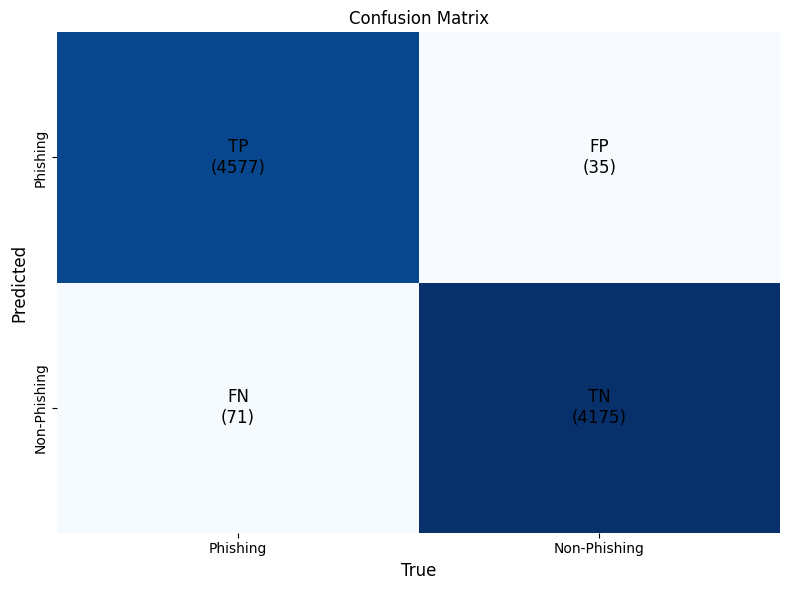

In [7]:
# create heatmap
printCM(y_pred_binary, y_test)

In [8]:
# 2nd model
tunemodel = MLPClassifier(hidden_layer_sizes = 80, random_state=1, max_iter=50, early_stopping=True, verbose=True).fit(X_train, y_train)

# Evaluate the model
y_pred_prob = tunemodel.predict(X_test)
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')


Iteration 1, loss = 0.77264405
Validation score: 0.930869
Iteration 2, loss = 0.36942951
Validation score: 0.957957
Iteration 3, loss = 0.20596170
Validation score: 0.980530
Iteration 4, loss = 0.16422112
Validation score: 0.967269
Iteration 5, loss = 0.15560586
Validation score: 0.983634
Iteration 6, loss = 0.22147926
Validation score: 0.975451
Iteration 7, loss = 0.39302430
Validation score: 0.987585
Iteration 8, loss = 0.17418407
Validation score: 0.987020
Iteration 9, loss = 0.14906574
Validation score: 0.989560
Iteration 10, loss = 0.13272676
Validation score: 0.983352
Iteration 11, loss = 0.09311609
Validation score: 0.975451
Iteration 12, loss = 0.12075676
Validation score: 0.987585
Iteration 13, loss = 0.08349388
Validation score: 0.989560
Iteration 14, loss = 0.14305088
Validation score: 0.988431
Iteration 15, loss = 0.11871357
Validation score: 0.993792
Iteration 16, loss = 0.08506101
Validation score: 0.994639
Iteration 17, loss = 0.07602840
Validation score: 0.994639
Iterat

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4210
           1       0.99      0.99      0.99      4648

    accuracy                           0.99      8858
   macro avg       0.99      0.99      0.99      8858
weighted avg       0.99      0.99      0.99      8858



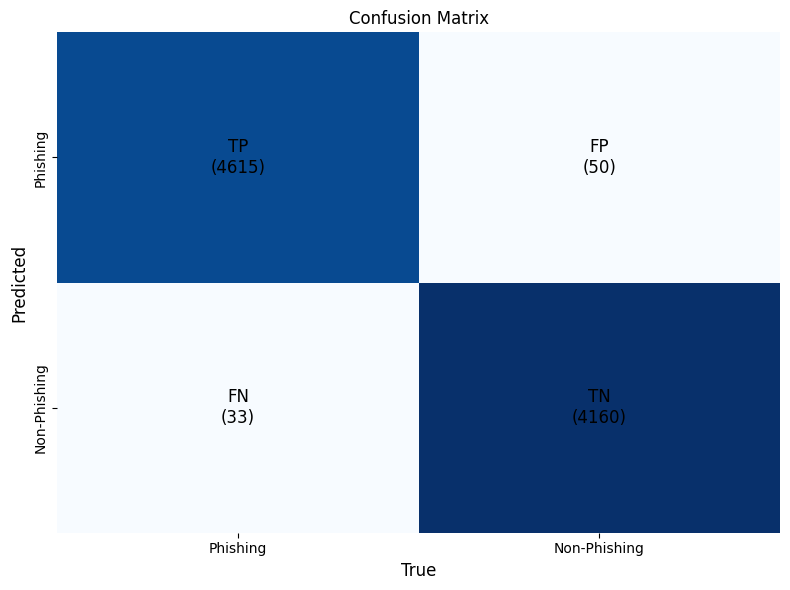

In [9]:
# create heatmap
printCM(y_pred_binary, y_test)

In [10]:
#Saving the tuned models that were already fitted with training data
with open('../model/MLPClassifier_ZiHin.pkl', 'wb') as file: pickle.dump(tunemodel, file)